In [18]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import re
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import stopwords
import string

In [2]:
 from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [34]:
import pandas as pd 
df=pd.read_csv('/content/gdrive/MyDrive/Project: Sentiment analysis/Facebook Sentiments Data.csv',usecols=[0,1,2,3,4])

In [35]:
df.head()

User ID         User Name  \
0  https://www.facebook.com/Subatbsmrstu?comment_...      Subat Iwbahm   
1  https://www.facebook.com/profile.php?id=100014...       Shahin Alam   
2  https://www.facebook.com/profile.php?id=100006...         মিজান শেখ   
3  https://www.facebook.com/junaid.kazin?comment_...      Junaid Kazin   
4  https://www.facebook.com/solaimanshukhon/?comm...  Solaiman Shukhon   

                                            Comments Sentiments  \
0                                     নগদ মোটিভেশান।   Positive   
1  পই পই করে এটা তো বুঝাইলেন না যে উপবৃত্তির টাকা...   Negative   
2                  আমি সুমন আর আপনাকে নিয়ে লাইভ করবো    Neutral   
3                                         Sala sogun   Negative   
4                 Hope the video clears a lot of air   Negative   

                                           Post Link  
0  https://www.facebook.com/solaimanshukhon/posts...  
1  https://www.facebook.com/solaimanshukhon/posts...  
2  https://www.facebook.com/solaimanshukhon/posts...  
3  https://www.facebook.com/solaimanshukhon/posts...  
4  https://www.facebook.com/solaimanshukhon/posts...

In [36]:
df['Sentiments'] = df['Sentiments'].astype(str) 
df.dtypes

User ID       object
User Name     object
Comments      object
Sentiments    object
Post Link     object
dtype: object

In [37]:
def cleanTxt(df): 
  number=re.sub("[^a-zA-Z]","",str(string))      # Replace all non-letters with spaces
  return df
df['Sentiments'] = df['Sentiments'].apply(cleanTxt)
df

User ID            User Name  \
0      https://www.facebook.com/Subatbsmrstu?comment_...         Subat Iwbahm   
1      https://www.facebook.com/profile.php?id=100014...          Shahin Alam   
2      https://www.facebook.com/profile.php?id=100006...            মিজান শেখ   
3      https://www.facebook.com/junaid.kazin?comment_...         Junaid Kazin   
4      https://www.facebook.com/solaimanshukhon/?comm...     Solaiman Shukhon   
...                                                  ...                  ...   
23725  https://www.facebook.com/profile.php?id=100075...       Shahidul Islam   
23726  https://www.facebook.com/ripongazi971985?comme...           Ripon Gazi   
23727  https://www.facebook.com/profile.php?id=100031...  নিজেকে হারিয়ে খুজি   
23728  https://www.facebook.com/profile.php?id=100050...       শারমিন সুলতানা   
23729  https://www.facebook.com/profile.php?id=100050...       শারমিন সুলতানা   

                                                Comments Sentiments  \
0                                         নগদ মোটিভেশান।   Positive   
1      পই পই করে এটা তো বুঝাইলেন না যে উপবৃত্তির টাকা...   Negative   
2                      আমি সুমন আর আপনাকে নিয়ে লাইভ করবো    Neutral   
3                                             Sala sogun   Negative   
4                     Hope the video clears a lot of air   Negative   
...                                                  ...        ...   
23725                                          মাশাল্লাহ   positive   
23726                                          MasaAllah   positive   
23727                                         গান্জা খোর   Negative   
23728  একটা নারী চাইলে খারাপ পুরুষ কে ভালো করতে পারে,...   positive   
23729                                nusrat imrose tisha   positive   

                                               Post Link  
0      https://www.facebook.com/solaimanshukhon/posts...  
1      https://www.facebook.com/solaimanshukhon/posts...  
2      https://www.facebook.com/solaimanshukhon/posts...  
3      https://www.facebook.com/solaimanshukhon/posts...  
4      https://www.facebook.com/solaimanshukhon/posts...  
...                                                  ...  
23725  https://www.facebook.com/photo/?fbid=593196835...  
23726  https://www.facebook.com/photo/?fbid=593196835...  
23727  https://www.facebook.com/photo/?fbid=593196835...  
23728  https://www.facebook.com/photo/?fbid=593196835...  
23729  https://www.facebook.com/photo/?fbid=593196835...  

[23730 rows x 5 columns]

In [38]:
from textblob import TextBlob
#Function for getting subjectivity
def getSubjectivity(Sentiments):
  return TextBlob(Sentiments).sentiment.subjectivity

#Function for getting polarity
def getPolarity(Sentiments):
  return TextBlob(Sentiments).sentiment.polarity

#Creating new columns
df['Subjectivity'] = df['Sentiments'].apply(getSubjectivity)
df['Polarity'] = df['Sentiments'].apply(getPolarity)
df

User ID            User Name  \
0      https://www.facebook.com/Subatbsmrstu?comment_...         Subat Iwbahm   
1      https://www.facebook.com/profile.php?id=100014...          Shahin Alam   
2      https://www.facebook.com/profile.php?id=100006...            মিজান শেখ   
3      https://www.facebook.com/junaid.kazin?comment_...         Junaid Kazin   
4      https://www.facebook.com/solaimanshukhon/?comm...     Solaiman Shukhon   
...                                                  ...                  ...   
23725  https://www.facebook.com/profile.php?id=100075...       Shahidul Islam   
23726  https://www.facebook.com/ripongazi971985?comme...           Ripon Gazi   
23727  https://www.facebook.com/profile.php?id=100031...  নিজেকে হারিয়ে খুজি   
23728  https://www.facebook.com/profile.php?id=100050...       শারমিন সুলতানা   
23729  https://www.facebook.com/profile.php?id=100050...       শারমিন সুলতানা   

                                                Comments Sentiments  \
0                                         নগদ মোটিভেশান।   Positive   
1      পই পই করে এটা তো বুঝাইলেন না যে উপবৃত্তির টাকা...   Negative   
2                      আমি সুমন আর আপনাকে নিয়ে লাইভ করবো    Neutral   
3                                             Sala sogun   Negative   
4                     Hope the video clears a lot of air   Negative   
...                                                  ...        ...   
23725                                          মাশাল্লাহ   positive   
23726                                          MasaAllah   positive   
23727                                         গান্জা খোর   Negative   
23728  একটা নারী চাইলে খারাপ পুরুষ কে ভালো করতে পারে,...   positive   
23729                                nusrat imrose tisha   positive   

                                               Post Link  Subjectivity  \
0      https://www.facebook.com/solaimanshukhon/posts...      0.545455   
1      https://www.facebook.com/solaimanshukhon/posts...      0.400000   
2      https://www.facebook.com/solaimanshukhon/posts...      0.000000   
3      https://www.facebook.com/solaimanshukhon/posts...      0.400000   
4      https://www.facebook.com/solaimanshukhon/posts...      0.400000   
...                                                  ...           ...   
23725  https://www.facebook.com/photo/?fbid=593196835...      0.545455   
23726  https://www.facebook.com/photo/?fbid=593196835...      0.545455   
23727  https://www.facebook.com/photo/?fbid=593196835...      0.400000   
23728  https://www.facebook.com/photo/?fbid=593196835...      0.545455   
23729  https://www.facebook.com/photo/?fbid=593196835...      0.545455   

       Polarity  
0      0.227273  
1     -0.300000  
2      0.000000  
3     -0.300000  
4     -0.300000  
...         ...  
23725  0.227273  
23726  0.227273  
23727 -0.300000  
23728  0.227273  
23729  0.227273  

[23730 rows x 7 columns]

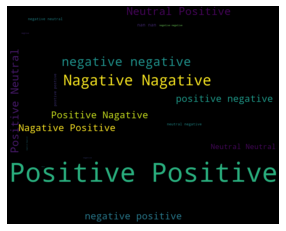

In [39]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in df['Sentiments']])
wordCloud = WordCloud(width =1000, height =800, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [40]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Class'] = df['Polarity'].apply(getAnalysis)

df

User ID            User Name  \
0      https://www.facebook.com/Subatbsmrstu?comment_...         Subat Iwbahm   
1      https://www.facebook.com/profile.php?id=100014...          Shahin Alam   
2      https://www.facebook.com/profile.php?id=100006...            মিজান শেখ   
3      https://www.facebook.com/junaid.kazin?comment_...         Junaid Kazin   
4      https://www.facebook.com/solaimanshukhon/?comm...     Solaiman Shukhon   
...                                                  ...                  ...   
23725  https://www.facebook.com/profile.php?id=100075...       Shahidul Islam   
23726  https://www.facebook.com/ripongazi971985?comme...           Ripon Gazi   
23727  https://www.facebook.com/profile.php?id=100031...  নিজেকে হারিয়ে খুজি   
23728  https://www.facebook.com/profile.php?id=100050...       শারমিন সুলতানা   
23729  https://www.facebook.com/profile.php?id=100050...       শারমিন সুলতানা   

                                                Comments Sentiments  \
0                                         নগদ মোটিভেশান।   Positive   
1      পই পই করে এটা তো বুঝাইলেন না যে উপবৃত্তির টাকা...   Negative   
2                      আমি সুমন আর আপনাকে নিয়ে লাইভ করবো    Neutral   
3                                             Sala sogun   Negative   
4                     Hope the video clears a lot of air   Negative   
...                                                  ...        ...   
23725                                          মাশাল্লাহ   positive   
23726                                          MasaAllah   positive   
23727                                         গান্জা খোর   Negative   
23728  একটা নারী চাইলে খারাপ পুরুষ কে ভালো করতে পারে,...   positive   
23729                                nusrat imrose tisha   positive   

                                               Post Link  Subjectivity  \
0      https://www.facebook.com/solaimanshukhon/posts...      0.545455   
1      https://www.facebook.com/solaimanshukhon/posts...      0.400000   
2      https://www.facebook.com/solaimanshukhon/posts...      0.000000   
3      https://www.facebook.com/solaimanshukhon/posts...      0.400000   
4      https://www.facebook.com/solaimanshukhon/posts...      0.400000   
...                                                  ...           ...   
23725  https://www.facebook.com/photo/?fbid=593196835...      0.545455   
23726  https://www.facebook.com/photo/?fbid=593196835...      0.545455   
23727  https://www.facebook.com/photo/?fbid=593196835...      0.400000   
23728  https://www.facebook.com/photo/?fbid=593196835...      0.545455   
23729  https://www.facebook.com/photo/?fbid=593196835...      0.545455   

       Polarity     Class  
0      0.227273  Positive  
1     -0.300000  Negative  
2      0.000000   Neutral  
3     -0.300000  Negative  
4     -0.300000  Negative  
...         ...       ...  
23725  0.227273  Positive  
23726  0.227273  Positive  
23727 -0.300000  Negative  
23728  0.227273  Positive  
23729  0.227273  Positive  

[23730 rows x 8 columns]

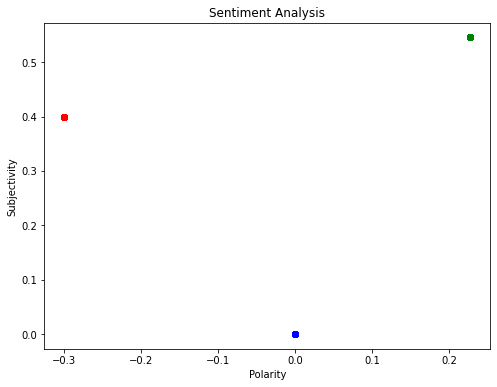

In [41]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    if df['Class'][i]=='Neutral':
         plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    elif df['Class'][i]=='Positive':
         plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Green')
    else:
         plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Red')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [54]:
pocomment = df[df.Class == 'Positive']
pocomment = pocomment['Sentiments']
round((pocomment.shape[0]/df.shape[0]*100), 1)

74.5

In [51]:
necomment = df[df.Class == 'Negative']
necomment = necomment['Sentiments']
round((necomment.shape[0]/df.shape[0]*100), 1)

8.1

In [49]:
neucomment = df[df.Class == 'Neutral']
neucomment = neucomment['Sentiments']
round((neucomment.shape[0]/df.shape[0]*100), 1)

17.4

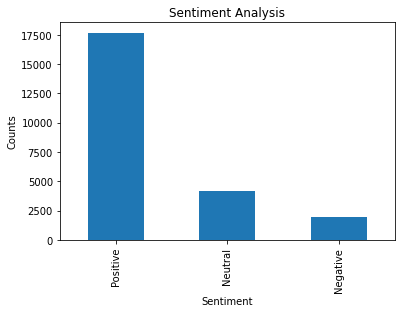

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Displaying the Sentiment Coutns
df['Class'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Class'].value_counts().plot(kind='bar')

plt.show()

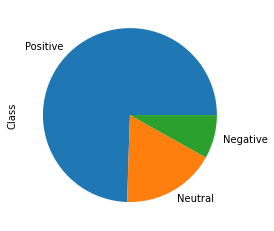

In [57]:
df['Class'].value_counts().plot(kind='pie')
plt.show()